In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Charger les données
df = pd.read_json("../cryptos_preprocessed.json")

In [50]:
# Features et cible
features = ['market_cap', 'total_volume', 'price_change_24h_%']
target = 'current_price'

In [51]:
# Nettoyage : Supprimer NaN et infinis
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=features + [target])

In [52]:
# Séparation des variables
X = df[features]
y = df[target]

In [53]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [55]:
# Entraînement et évaluation
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

In [56]:
# Résultats sous forme de tableau
df_results = pd.DataFrame(results)
print(df_results)

               Model          RMSE          MAE        R²
0  Linear Regression  17781.847730  6457.098244 -0.222272
1      Random Forest  15685.113914  6168.962120  0.048980
2  Gradient Boosting  19333.248622  7757.864244 -0.444854


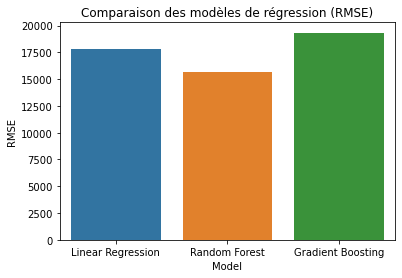

In [45]:
# Visualisation des performances
sns.barplot(x='Model', y='RMSE', data=df_results)
plt.title("Comparaison des modèles de régression (RMSE)")
plt.ylabel("RMSE")
plt.show()

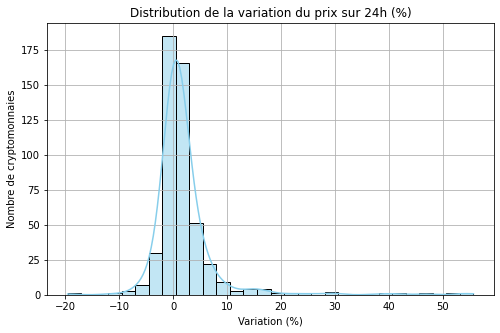

In [47]:
# Histogrammes des features
plt.figure(figsize=(8, 5))
sns.histplot(df['price_change_24h_%'], kde=True, color='skyblue', bins=30)
plt.title('Distribution de la variation du prix sur 24h (%)')
plt.xlabel('Variation (%)')
plt.ylabel('Nombre de cryptomonnaies')
plt.grid(True)
plt.show()